# Logistic Regression
Logistic regression produces results in a binary format: <br>
- 0 or 1
- Yes or No
- True or False
- High or Low

### Why not linear regression: <br>
<img src="data/images/linear_vs_logistic.png" alt="xxx" title="title" width=260 height=260 />

### Read data

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

titanic_data = pd.read_csv('data/titanic.csv', sep='\t')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


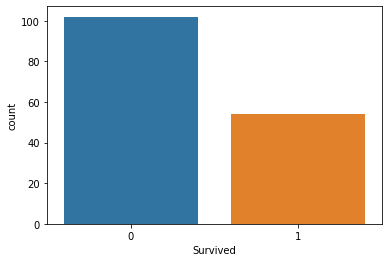

In [4]:
sns.countplot(x="Survived", data=titanic_data)

### See different graphs

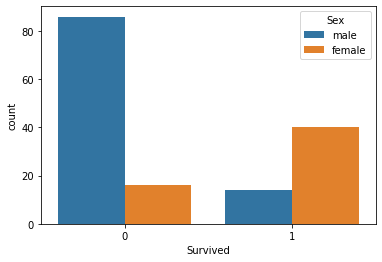

In [30]:
sns.countplot(x="Survived", hue='Sex', data=titanic_data)

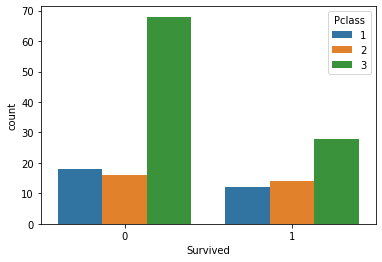

In [6]:
sns.countplot(x="Survived", hue='Pclass', data=titanic_data)

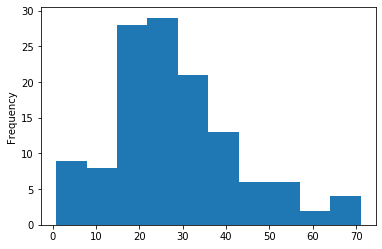

In [7]:
titanic_data['Age'].plot.hist()

### See another kind of data

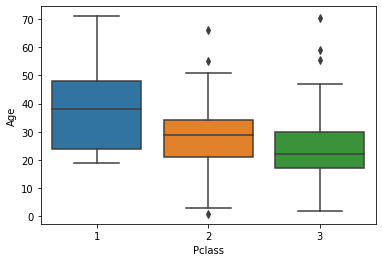

In [35]:
sns.boxplot(x="Pclass", y='Age', data=titanic_data)

### To see which columns have null values:

In [32]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

### Visualize where do you have missing values:

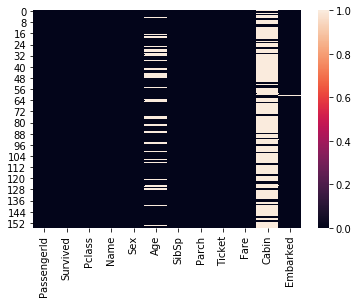

In [34]:
sns.heatmap(titanic_data.isnull())

### Drop the collumns with missing data

In [36]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [37]:
titanic_data.dropna(inplace=True)

In [38]:
sex = pd.get_dummies(titanic_data["Sex"], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [39]:
embark = pd.get_dummies(titanic_data["Embarked"], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [40]:
Pcl = pd.get_dummies(titanic_data["Pclass"], drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [41]:
titanic_data = pd.concat([titanic_data, sex, embark, Pcl], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [42]:
titanic_data.drop(["Sex", "Embarked", "PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [43]:
titanic_data.drop(["Pclass"], axis=1, inplace=True)

In [44]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Splitting from features to outcome

In [45]:
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

### Making the split between train and test

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Creating the model and train it

In [55]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\dbratu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Make predictions

In [48]:
predictions = logmodel.predict(X_test)

### See metrics

In [57]:
from sklearn.metrics import classification_report

In [50]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.88      0.93      0.90        30\n           1       0.67      0.50      0.57         8\n\n    accuracy                           0.84        38\n   macro avg       0.77      0.72      0.74        38\nweighted avg       0.83      0.84      0.83        38\n'

### Confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test, predictions)

array([[28,  2],
       [ 4,  4]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8421052631578947